## Assignment 2 - Regression (Gradient Descent)

### Parth Bansal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression

### Part A: Data Cleaning & Exploratory Analysis

In [2]:
df = pd.read_csv('/Users/parthbansal/Downloads/bottle.csv')
df.head()

/var/folders/0y/n_xgd2n97837m629ymdq84rr0000gn/T/ipykernel_39582/2279483484.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/parthbansal/Downloads/bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(864863, 74)

In [4]:
df = df[['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']] 

In [5]:
df = df.dropna()

In [6]:
df.shape

(661268, 5)

In [7]:
# Outliers are removed in STheta
df['STheta'].max()

28.083

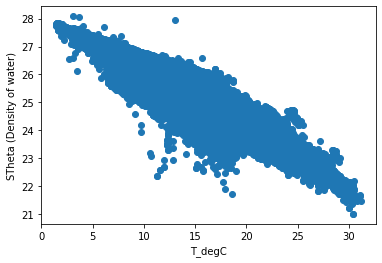

In [8]:
# Plotting STheta to see if there are outliers
plt.scatter(df['T_degC'], df['STheta'])
plt.xlabel('T_degC')
plt.ylabel('STheta (Density of water)')
plt.show()

### Part B: Train & Test Split

In [9]:
X = df[['Salnty', 'STheta', 'O2ml_L', 'Depthm']]
y = df['T_degC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X.shape

(661268, 4)

In [11]:
y = np.array(y).reshape(-1, 1)
y.shape

(661268, 1)

In [12]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [13]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Part C: Linear Regression with sklearn

#### (1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

In [14]:
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

#### (2) Print out the coefficients (including the intercept)

In [16]:
print("Coefficients:", lin_reg.coef_)

Coefficients: [ 1.62993675 -4.63279593  0.30196665 -0.47439098]


In [17]:
print("Intercept:", lin_reg.intercept_)

Intercept: 10.917223921532479


#### (3) Predict T_degC for the test data using the fitted values in b.

In [18]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)

#### (4) Calculate the following for the test data: mean squared error, r-squared, explained variance

In [19]:
mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)
evs = explained_variance_score(y_test, y_pred_sklearn)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Explained Variance Score:", evs)

Mean Squared Error: 0.11101117205433658
R-Squared: 0.9937682503632342
Explained Variance Score: 0.9937684088237414


#### (5) Create a scatterplot that shows actual versus predicted values for the T_degC.

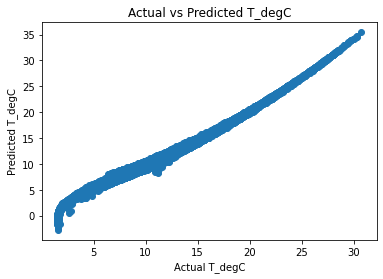

In [20]:
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.title('Actual vs Predicted T_degC')
plt.show()

### Part D: Gradient Descent Mini-Batch

In [21]:
X_train_scaled = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]

In [22]:
def mse_cost_function(X, y, theta):
    m = len(X)
    y_pred = X.dot(theta)
    mse = (1/m) * np.sum(np.square(y_pred - y))
    return mse

In [23]:
def mini_batch_gradient_descent(X, y, eta, n_epochs, batch_size):
    m, n = X.shape
    n_batches = m // batch_size
    
    np.random.seed(42)
    theta = np.random.randn(n, 1)
    
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(n_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            gradients = 2/batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta = theta - eta * gradients
    
    return theta

In [24]:
def evaluate_model(X, y, theta):
    y_pred = X.dot(theta)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    evs = explained_variance_score(y, y_pred)
    return mse, r2, evs

In [25]:
batch_sizes = [50, 250, 2000]

Batch size:  50
Test MSE:  0.11777444171606602
Test R-squared: 0.9933885858440884
Test Explained Variance:  0.9934316080207575


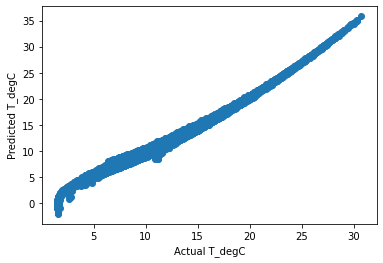

Batch size:  50
Train MSE:  0.11730141185337137
Train R-squared: 0.9934302569923417
Train Explained Variance:  0.9934786723370813 

Batch size:  250
Test MSE:  0.11197185411784635
Test R-squared: 0.9937143212857411
Test Explained Variance:  0.9937228707699207


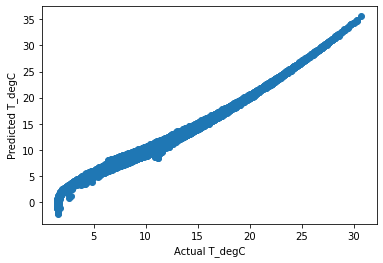

Batch size:  250
Train MSE:  0.11159822188662577
Train R-squared: 0.9937496776353959
Train Explained Variance:  0.9937607651434958 

Batch size:  2000
Test MSE:  0.11110354152186708
Test R-squared: 0.9937630650887698
Test Explained Variance:  0.9937631409387447


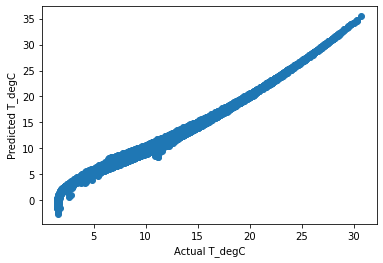

Batch size:  2000
Train MSE:  0.11072663842437415
Train R-squared: 0.9937984927286352
Train Explained Variance:  0.9937985078812134 



In [29]:
for batch_size in batch_sizes:
    theta = mini_batch_gradient_descent(X_train_scaled, y_train.values.reshape(-1, 1), eta=0.1, n_epochs=100, batch_size=batch_size)
    
    mse, r2, evs = evaluate_model(X_test_scaled, y_test.values.reshape(-1, 1), theta)
    print("Batch size: ", batch_size)
    print("Test MSE: ", mse)
    print("Test R-squared:", r2)
    print("Test Explained Variance: ", evs)
    
    y_pred = X_test_scaled.dot(theta)
    
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual T_degC')
    plt.ylabel('Predicted T_degC')
    plt.show()
    
    mse, r2, evs = evaluate_model(X_train_scaled, y_train.values.reshape(-1, 1), theta)
    print("Batch size: ", batch_size)
    print("Train MSE: ", mse)
    print("Train R-squared:", r2)
    print("Train Explained Variance: ", evs, "\n")

### Part E: Conceptual Questions

**Describe how parameter estimation in Gradient Descent differs from using the normal equation.**
Gradient Descent estimates the parameters by iteratively updating them based on the error between the predicted values and the actual values in the training data, while the normal equation estimates the parameters by solving a set of equations that directly minimize the cost function. 


**We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?**
Unlike in Stochastic Gradient Descent, in mini-batch gradient descent, instead of using the entire training set, a random subset of training data is used in each iteration.

**Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.**
We can try different regression models (ex. ridge) or we can add more features. 


**Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?**
The learning rate is a parameter that determines how fast or slow a machine learning model learns. A high learning rate means the model learns quickly, but may not produce the best solution, and vice versa. 


**Why would a data scientist want to use early stopping in gradient descent?**
To avoid overfitting and improve the model's generalization ability. 